# Semester 4 Coding Portfolio Part 4: Time Series Part B: Differencing, Stationarity, Seasonality & ACF/PACF

This notebook is expected to take around 20 hours to complete:
 - 4 hours for the formative part
 - 6 hours of self-study on the topics covered by this notebook
 - 10 hours for the summative part of this notebook

Like all notebooks in this portfolio, it is split into two sections:
 - Formative 
 - Summative

<b>Formative section</b><br>
Simply complete the given functions! You may ask for help from fellow students and TAs on this section, and solutions might be provided later on.

<b>Summative section</b><br>
In this section, you are asked to do original work with little guidance, based on the skills you learned in the formative part (as well as lectures and workshops).
This section is graded not just on passing automated tests, but also on quality, originality, and effort (see assessment criteria in the assignment description).

In [1]:
# TODO: Please enter your student number here
STUDENT_NUMBER = 14806762

# Formative Section
Please do not add additional cells to this section, and do not delete given code. Simply fill out the code or answer questions in the given cells.

In [2]:
# load some useful libraries

import statsmodels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter 
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
import warnings
warnings.filterwarnings("ignore")

# Set display option to avoid scientific notation in pandas, show up to 5 decimal points
pd.set_option('display.float_format', lambda x: '%.5f' % x)
# and numpy
np.set_printoptions(suppress=True, precision=5)

### Part 1: Bitcoin Price at Close

In [3]:
# Load the Bitcoin dataset
df = pd.read_csv('sem4_portfolio_4_data.csv')

display(df.head())

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-20,394.67300,423.29599,389.88300,408.90399,408.90399,36863600
1,2014-09-21,408.08499,412.42600,393.18100,398.82101,398.82101,26580100
2,2014-09-22,399.10001,406.91598,397.13000,402.15201,402.15201,24127600
3,2014-09-23,402.09201,441.55701,396.19699,435.79098,435.79098,45099500
4,2014-09-24,435.75101,436.11200,421.13199,423.20499,423.20499,30627700


a) Plot the time series.

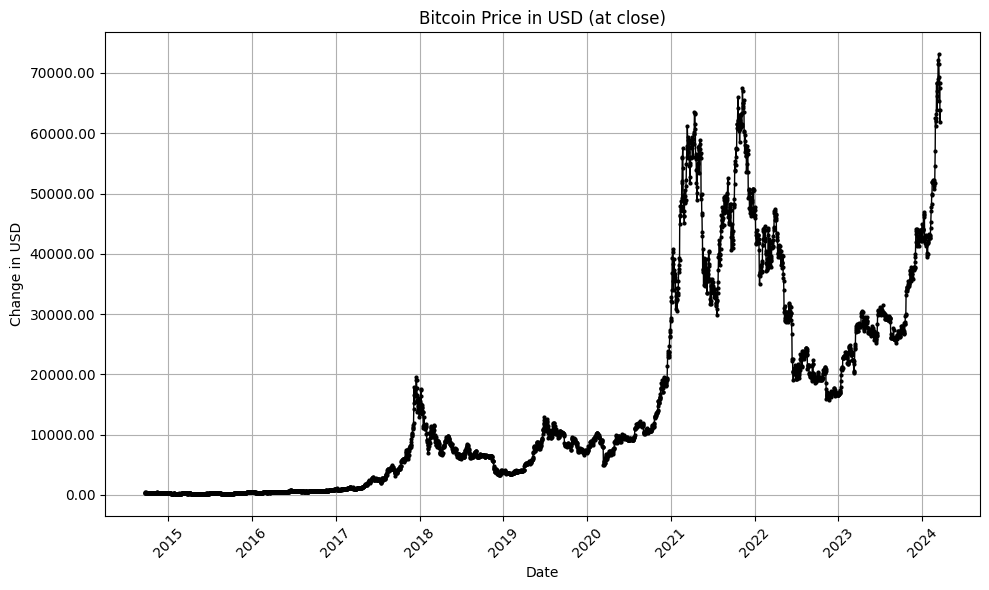

In [4]:
# TODO 1: Plot the time series

#. Your solution here ...

# Convert the timestamp column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Plot the time series of Bitcoin prices
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], marker='o', linestyle='-', color='black',markersize = 2,linewidth=1)
plt.title('Bitcoin Price in USD (at close)')
plt.xlabel('Date')
plt.ylabel('Change in USD')
plt.grid(True)
# Manually format y-axis labels to avoid scientific notation
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.2f}'.format(x)))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

b) Using the ADF function test whether the series is stationary. Remember your null-hypothesis is that there is a unit-root (i.e. it's a random walk or a random walk with drift), and hence a non-stationary process. A p-value close to zero here tells us the process is stationary. 

In [5]:
from statsmodels.tsa.stattools import adfuller

# Applying the Augmented Dickey-Fuller test on the first-differenced log-transformed series
# Note: We drop the first NaN value that results from differencing
adf_result = adfuller(df['Close'].dropna())

adf_output = pd.Series(adf_result[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_result[4].items():
    adf_output[f'Critical Value ({key})'] = value

adf_output

Test Statistic                  -0.56307
p-value                          0.87911
#Lags Used                      29.00000
Number of Observations Used   3440.00000
Critical Value (1%)             -3.43225
Critical Value (5%)             -2.86238
Critical Value (10%)            -2.56722
dtype: float64

#### c) Stabilise the series' variance via a monotonic transformation. 

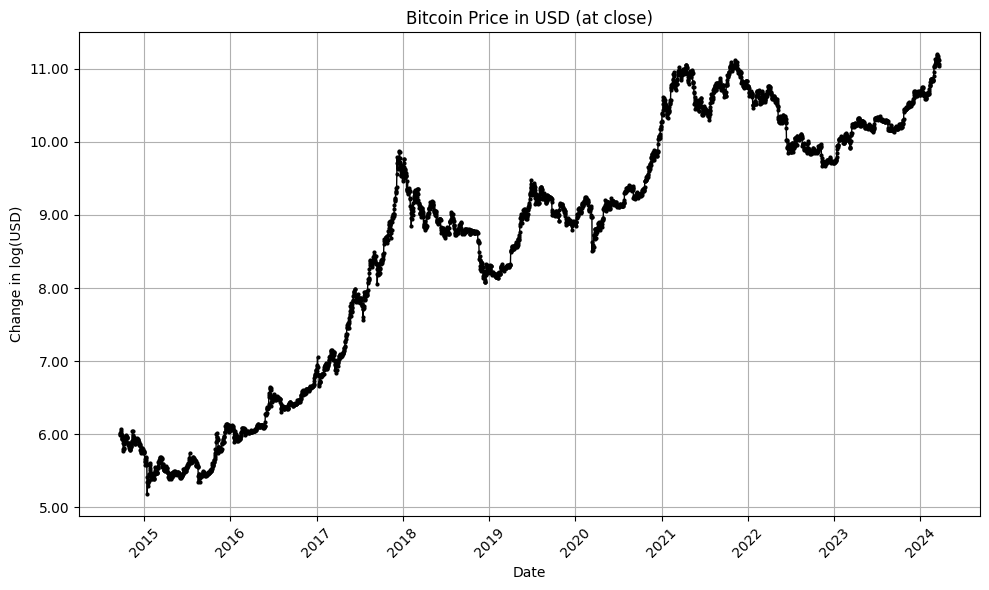

In [6]:
# TODO 2: Stabilize variance by taking the log of the series

#. Your solution here ...
df['log_Close'] = np.log(df['Close'])

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['log_Close'], marker='o', linestyle='-', color='black',markersize = 2,linewidth=1)
plt.title('Bitcoin Price in USD (at close)')
plt.xlabel('Date')
plt.ylabel('Change in log(USD)')
plt.grid(True)
# Manually format y-axis labels to avoid scientific notation
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.2f}'.format(x)))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

d) Is the series stationary? 

In [7]:
from statsmodels.tsa.stattools import adfuller

# TODO 3: Apply the Augmented Dickey-Fuller test on the first-differenced log-transformed series
# Note: We drop the first NaN value that results from differencing

adf_result = adfuller(df['Close'].dropna())

#. Your solution here ...
# Store the results in a pandas Series for better readability
adf_output = pd.Series(adf_result[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_result[4].items():
    adf_output[f'Critical Value ({key})'] = value

print(adf_output)

Test Statistic                  -0.56307
p-value                          0.87911
#Lags Used                      29.00000
Number of Observations Used   3440.00000
Critical Value (1%)             -3.43225
Critical Value (5%)             -2.86238
Critical Value (10%)            -2.56722
dtype: float64


e) Calculate and plot the first difference of the log USD Bitcoin price. 

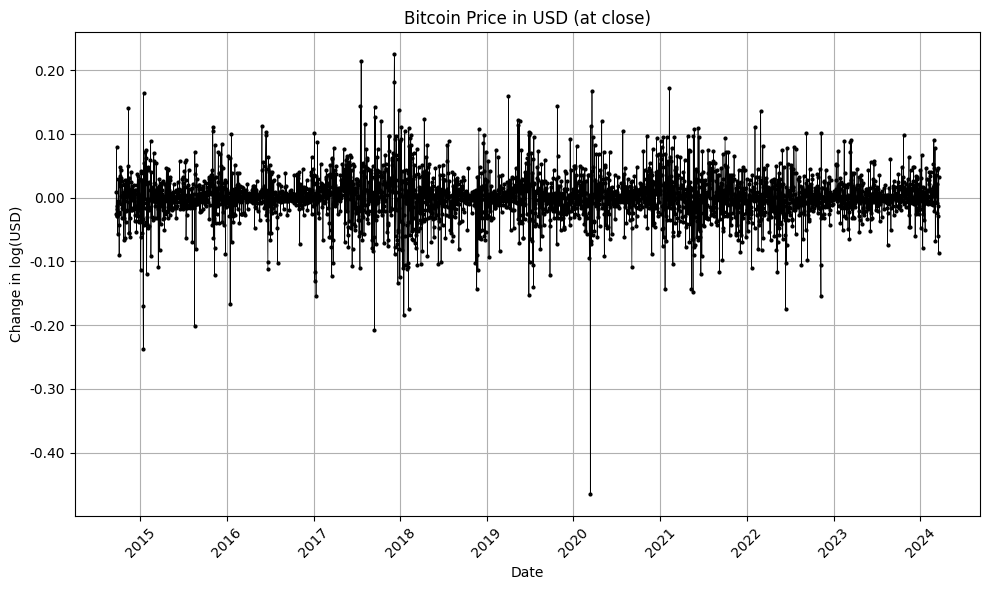

In [8]:
# TODO 4: Calculate the first difference 
df['log_Close_diff'] = df['log_Close'].diff()

#. Your solution here ...

# Plotting the first difference of the log-transformed series
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['log_Close_diff'], marker='o', linestyle='-', color='black', markersize=2,linewidth=0.5)
plt.title('Bitcoin Price in USD (at close)')
plt.xlabel('Date')
plt.ylabel('Change in log(USD)')
plt.grid(True)
# Manually format y-axis labels to avoid scientific notation
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.2f}'.format(x)))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### f) Is the series stationary now ? 

In [9]:
from statsmodels.tsa.stattools import adfuller

# TODO 5: Applying the Augmented Dickey-Fuller test on the first-differenced log-transformed series
# Note: We drop the first NaN value that results from differencing
#!# BEGIN SOLUTION
adf_result = adfuller(df['log_Close_diff'].dropna())

adf_output = pd.Series(adf_result[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_result[4].items():
    adf_output[f'Critical Value ({key})'] = value
# END SOLUTION

print(adf_output)

Test Statistic                 -17.83677
p-value                          0.00000
#Lags Used                       9.00000
Number of Observations Used   3459.00000
Critical Value (1%)             -3.43224
Critical Value (5%)             -2.86238
Critical Value (10%)            -2.56721
dtype: float64


#### g) Using the ACF and PACF, identify the SARIMA order of this series. 

<Figure size 1200x600 with 0 Axes>

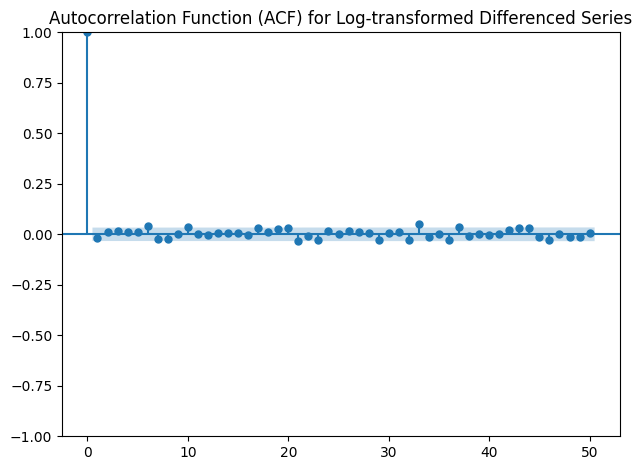

<Figure size 1200x600 with 0 Axes>

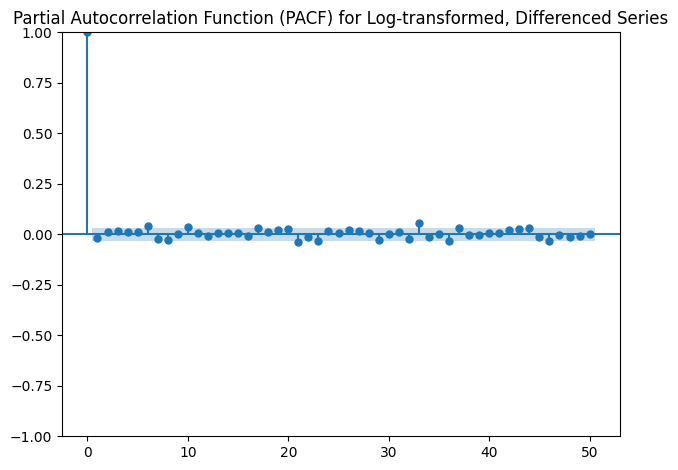

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# TODO 6: Plotting the Autocorrelation Function (ACF)
#!# BEGIN SOLUTION
plt.figure(figsize=(12, 6))
plot_acf(df['log_Close_diff'].dropna(), lags=50, alpha=0.05, title='Autocorrelation Function (ACF) for Log-transformed Differenced Series')
plt.tight_layout()
#!# END SOLUTION

# TODO 7: Plotting the Partial Autocorrelation Function (PACF)
#!# BEGIN SOLUTION
plt.figure(figsize=(12, 6))
plot_pacf(df['log_Close_diff'].dropna(), lags=50, alpha=0.05, title='Partial Autocorrelation Function (PACF) for Log-transformed, Differenced Series')
plt.tight_layout()
#!# END SOLUTION

plt.show()

This series is clearly White noise !

#### h) Now Use the auto_arima function to estimate an optimal order for the series `on the original scale, before differencing`, and generate a summary of the model. 

In [11]:
from pmdarima import auto_arima
import pandas as pd

# Note: We drop the first NaN value that results from differencing
series = df['Close'].dropna()
series.index = pd.to_datetime(df['Date'])  # Assuming 'series.index' contains date strings


# TODO 8: Use auto_arima to find the optimal SARIMA model
auto_model = auto_arima(series,
                        start_p=0, start_q=0,
                        max_p=20, max_q=20,  # Maximum p and q
                        #m=4,  # Adjust this based on your seasonality (e.g., 12 for monthly data with annual seasonality)
                        #start_P=0, start_Q=0, 
                        #max_P=20, max_Q=20,
                        seasonal=False,  # Enable search for seasonal parameters
                        #D=1,  # Assuming one seasonal differencing. Adjust as needed.
                        test='adf',  # Use ADF test to find optimal 'd'
                        trace=True,
                        error_action='ignore',  
                        suppress_warnings=True, 
                        stepwise=True)

#. Your solution here ...

print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=56377.848, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=56375.280, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=56375.458, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=56377.587, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=56376.155, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=56376.891, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=56371.618, Time=0.84 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=56373.525, Time=0.48 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=56366.399, Time=0.77 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=56372.223, Time=0.92 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=56361.504, Time=1.52 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.59 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=56368.633, Time=1.67 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=56375.207, Time=0.86 sec
 ARIMA(4,1,1)(0,0,0)[0] i

#### Time Series Model Evaluation: Rolling Forecast Origin

Now that we have fitted our model it is a good time to test its forecasting abilities.

As said before (in the previous workbook), we cannot just apply k-fold cross validation on our time series data: we need a methodology that respects the chronological order of the data. This necessity brings us to the concept of **rolling forecast origin** and **expanding window** approaches, designed specifically for the sequential evaluation of time-series models.

##### Rolling Forecast Origin: Leveraging Temporal Dynamics

Think of time-series cross-validation as a systematic way to "walk forward" through your data. This approach is akin to unfolding the data piece by piece, using each new piece to test the forecasting ability of the model trained on all the preceding pieces.

1. **Data Splitting**: Start by delineating your dataset into training and testing segments. This initial step is more straightforward than in k-fold, focusing on a temporal split rather than a random one.

2. **Model Training**: Train your ARMA model on the designated training data. This process equips the model with the historical context needed to make its first set of forecasts.

3. **Rolling Forecasts**: Deploy the model to predict the immediate next time point in the sequence, then incorporate this actual next point into your training dataset for the subsequent prediction. This step mirrors real-world forecasting scenarios where predictions are continually updated with the latest data.

4. **Performance Evaluation**: Assess the model's forecasting accuracy at each step by comparing the predictions against the actual observations. Metrics like the Mean Squared Error (MSE) serve as quantitative measures of the model's precision.

5. **Iterative Validation**: Repeat the forecast-and-update cycle across the testing dataset. This iterative process provides a cumulative assessment of the model's performance over time, offering insights into its reliability and robustness.

More on rolling origin can be found [here](https://openforecast.org/adam/rollingOrigin.html).


#### i) Using a 'Rolling Origin' type forecast, estimate the expected one-step-ahead generalisation error.

In [12]:
# Extract the order (p, d, q)
order = auto_model.order

# Extract the seasonal order (P, D, Q, m)
seasonal_order = auto_model.seasonal_order

print(f"Non-seasonal order: {order}")
print(f"Seasonal order: {seasonal_order}")

Non-seasonal order: (3, 1, 2)
Seasonal order: (0, 0, 0, 0)


In [13]:
# Split the dataset into training and test sets
train_size = int(len(series) * 0.95)
series_train, series_test = series[:train_size], series[train_size:]

history = series_train.values.copy()
predictions = []
confidence_intervals = []

# Rolling forecast origin
from tqdm import trange
from statsmodels.tsa.statespace.sarimax import SARIMAX

for t in trange(len(series_test)):
    # Fit the SARIMA model on the history
    model = SARIMAX(history, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)  # Suppress fitting messages
    
    # Forecast the next point and get the 95% confidence interval
    forecast_result = model_fit.get_forecast(steps=1)
    yhat = forecast_result.predicted_mean
    conf_int = forecast_result.conf_int(alpha=0.05)  # 95% confidence interval
    
    predictions.append(yhat[0])  # Access forecast result correctly
    confidence_intervals.append(conf_int[0])  # Store confidence interval for each forecast
    
    # Correctly add the actual observation from series_test to history for the next loop
    actual_obs = series_test.iloc[t]  # Use .iloc[t] to correctly access the observation
    history = np.append(history, actual_obs)

100%|██████████| 174/174 [02:15<00:00,  1.29it/s]


Test RMSE: 1345.845457612584


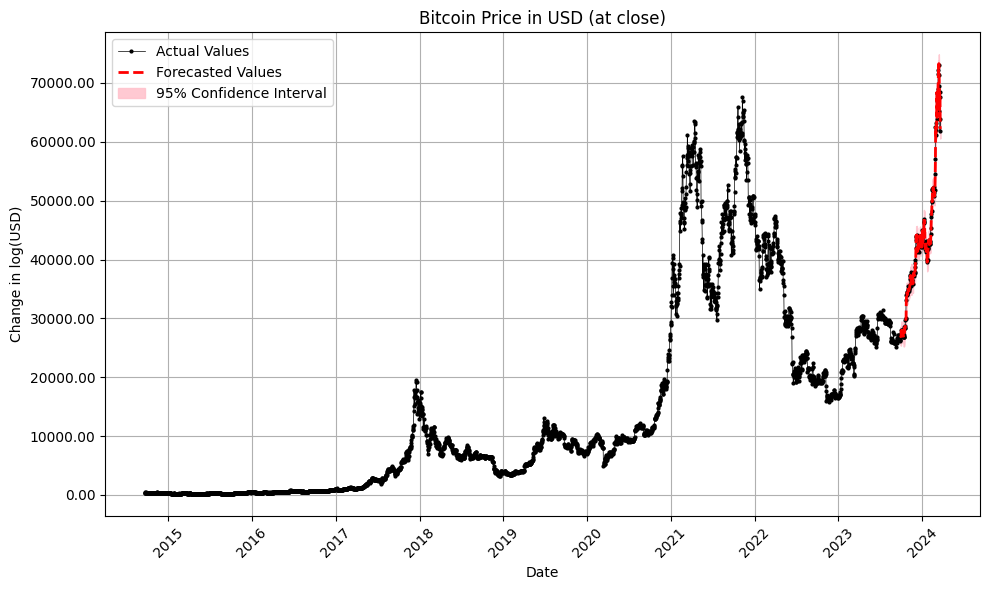

In [14]:
# Calculate RMSE
rmse = np.sqrt(np.mean((predictions - series_test)**2))
print(f'Test RMSE: {rmse}')

# Plotting the forecast along with the actual series and confidence intervals
plt.figure(figsize=(10, 6))
# Plotting the entire original series
plt.plot(series.index, series, marker='o', linestyle='-', color='black', markersize=2, linewidth=0.5, label='Actual Values')

# Plotting the forecasted values on the test set
plt.plot(series_test.index, predictions, label='Forecasted Values', color='red', linestyle='--', linewidth=2)

# Extracting lower and upper confidence bounds
lower_bounds = [ci[0] for ci in confidence_intervals]
upper_bounds = [ci[1] for ci in confidence_intervals]

# Plotting the confidence interval
plt.fill_between(series_test.index, lower_bounds, upper_bounds, color='pink', alpha=0.85, label='95% Confidence Interval')

plt.title('Bitcoin Price in USD (at close)')
plt.xlabel('Date')
plt.ylabel('Change in log(USD)')
plt.grid(True)
# Manually format y-axis labels to avoid scientific notation
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.2f}'.format(x)))
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#### Part 2: The Airline Passengers dataset (https://www.kaggle.com/code/sunaysawant/air-passengers-time-series-arima/notebook) -- Series Decomposition & Seasonality.

In [15]:
# Load airplane dataset
airline = pd.read_csv('sem4_portfolio_4_dataB.csv', index_col='Month')
airline.index = pd.to_datetime(airline.index)

display(airline.head())

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


#### a) Plot the series

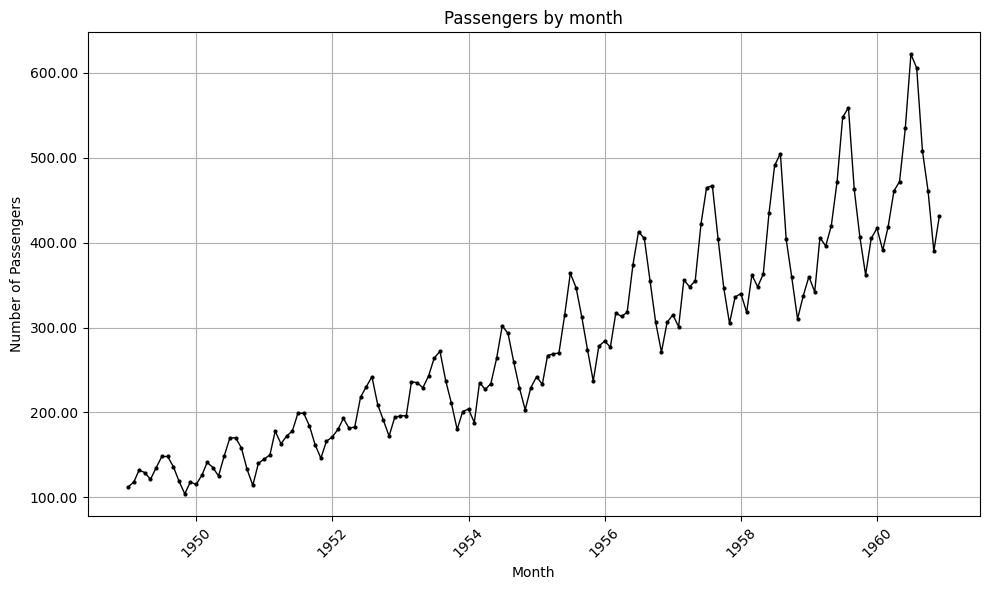

In [16]:
# TODO 9: Plot the time series to check for trends or seasonality.
#. Your solution here ...  


# Plot the time series of Bitcoin prices
plt.figure(figsize=(10, 6))
plt.plot(airline.index, airline['#Passengers'], marker='o', linestyle='-', color='black',markersize = 2,linewidth=1)
plt.title('Passengers by month')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.grid(True)
# Manually format y-axis labels to avoid scientific notation
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.2f}'.format(x)))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### b) Check if the time series is stationary 

In [17]:
from statsmodels.tsa.stattools import adfuller

# TODO 10: Applying the Augmented Dickey-Fuller test on the first-differenced log-transformed series
# Note: We drop the first NaN value that results from differencing
#. Your solution here ...

# Apply log transformation to stabilize variance
airline['log_Passengers'] = np.log(airline['#Passengers'])

# First-difference the log-transformed series to remove trend
airline['log_Passengers_diff'] = airline['log_Passengers'].diff()

# Drop the first NaN value that results from differencing
adf_result = adfuller(airline['log_Passengers_diff'].dropna())

# Store ADF test results in a pandas Series
adf_output = pd.Series(adf_result[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_result[4].items():
    adf_output[f'Critical Value ({key})'] = value
    
print(adf_output)

Test Statistic                 -2.71713
p-value                         0.07112
#Lags Used                     14.00000
Number of Observations Used   128.00000
Critical Value (1%)            -3.48250
Critical Value (5%)            -2.88440
Critical Value (10%)           -2.57896
dtype: float64


#### Decomposing Time Series Data

Take a look at our data again. Can you see a seasonal component? What about a global trend? If we identify these, we can try to remove these components by *differencing*. When we spot a yearly seasonality as in our case, we tackle it by subtracting the data point from the same point one season ago—effectively, each data point minus the one 12 months prior if our data is monthly. This method often helps to smooth out peaks and troughs that occur at the same time each year.

For global trends, which are long-term increases or decreases in the dataset, we apply a similar concept but instead look at the data points one after the other. We subtract each data point from the one before it, which can help to level out any persistent upward or downward drift in the data over time. Through these steps of seasonal and regular differencing, we aim to stabilize the mean of the time series so that the transformed data looks consistent over time, without a trend or seasonality.

#### c) Use `sm.tsa` built-in `seasonal_decompose()` to decompose the series into its constituent parts. 

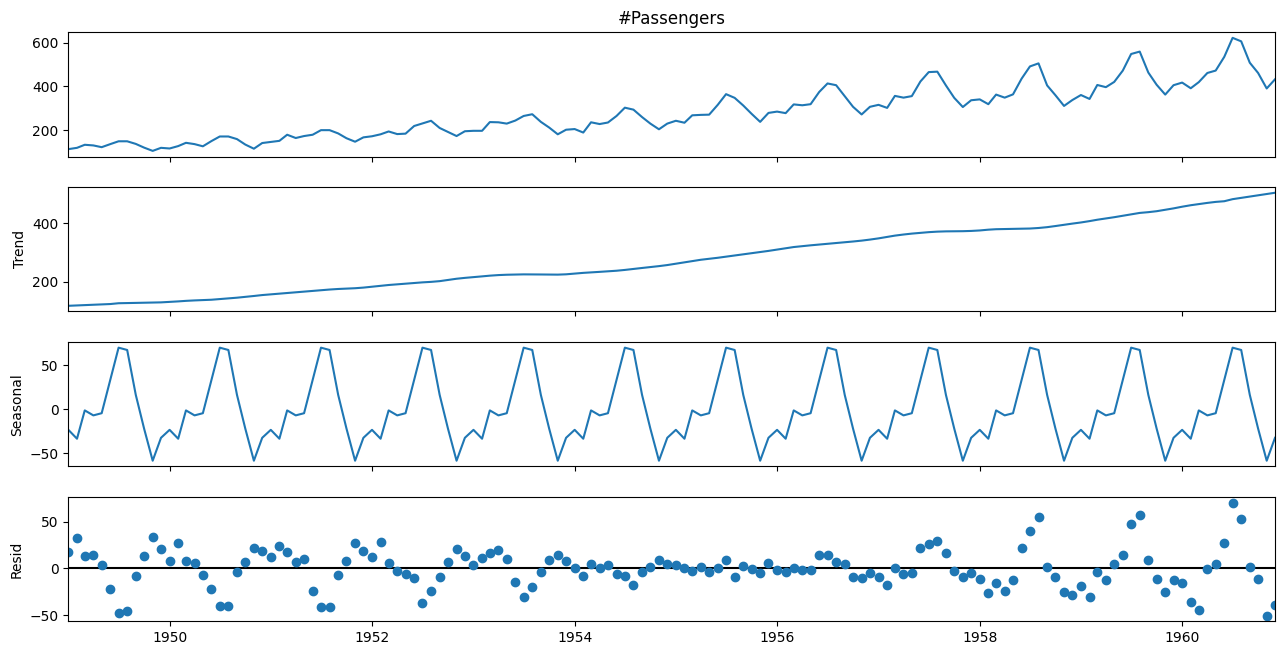

In [18]:
decomposition = sm.tsa.seasonal_decompose(airline['#Passengers'], model='additive', extrapolate_trend=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig = decomposition.plot()
fig.set_size_inches(14, 7)
plt.show()

d) Take a first difference of the series and plot it


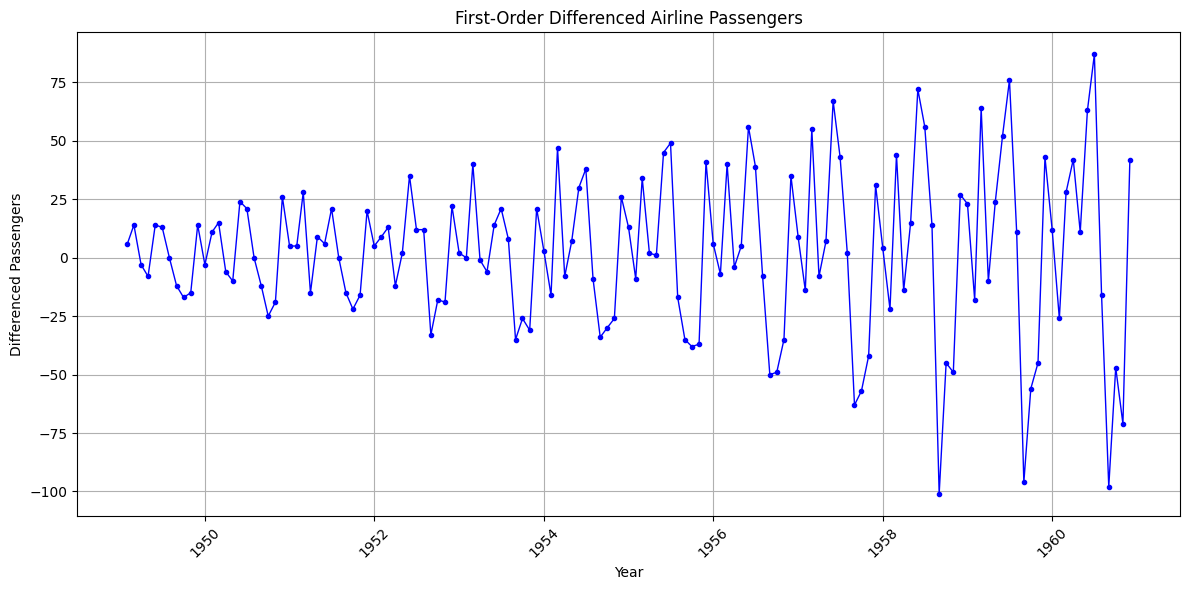

In [19]:
# TODO 11: Differencing
#. Your solution here ...

# First-order differencing to remove trend
airline['Passengers_diff'] = airline['#Passengers'].diff()

# Drop NaN values from differencing
airline.dropna(inplace=True)

# Plot the differenced series
plt.figure(figsize=(12, 6))
plt.plot(airline.index, airline['Passengers_diff'], color='blue', linestyle='-', marker='o', markersize=3, linewidth=1)
plt.title('First-Order Differenced Airline Passengers')
plt.xlabel('Year')
plt.ylabel('Differenced Passengers')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### e) Take a seasonal (yearly) first difference

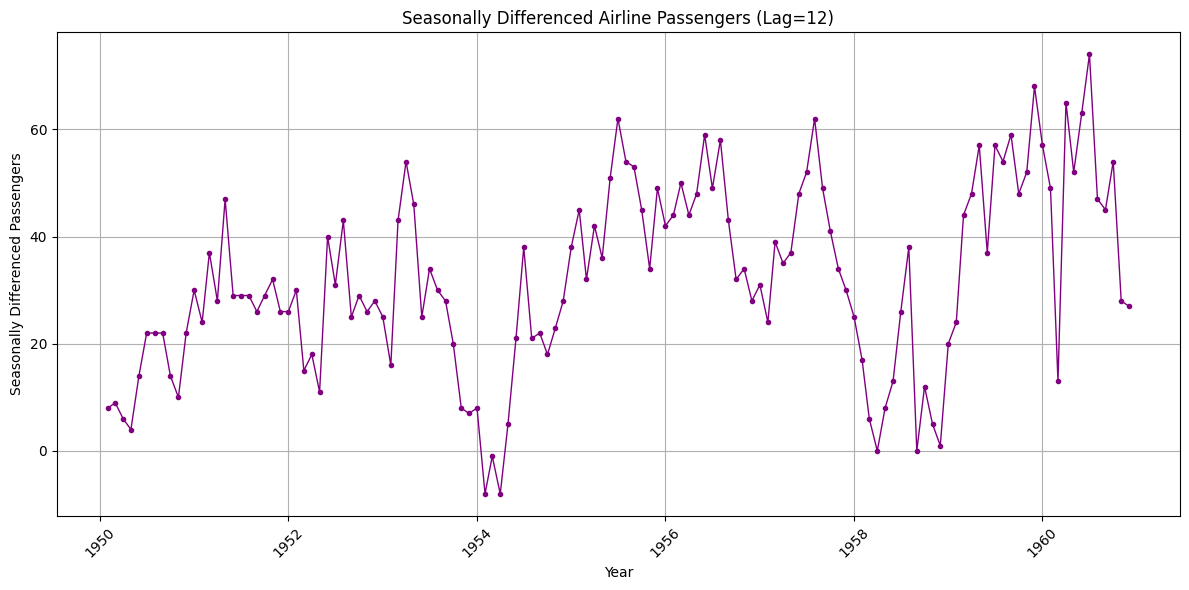

In [20]:
# If you know there is seasonality of a specific period, you can difference by that period
# For example, if there is yearly seasonality, you might do:
seasonal_diff = airline.diff(12).dropna()

# TODO 12: Plot the seasonally differenced time series
#. Your solution here ...

# Plot the seasonally differenced time series
plt.figure(figsize=(12, 6))
plt.plot(seasonal_diff.index, seasonal_diff['#Passengers'], color='purple', linestyle='-', marker='o', markersize=3, linewidth=1)

# Title and labels
plt.title('Seasonally Differenced Airline Passengers (Lag=12)')
plt.xlabel('Year')
plt.ylabel('Seasonally Differenced Passengers')
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


#### f) Apply both the differencing and seasonal differencing to the time series

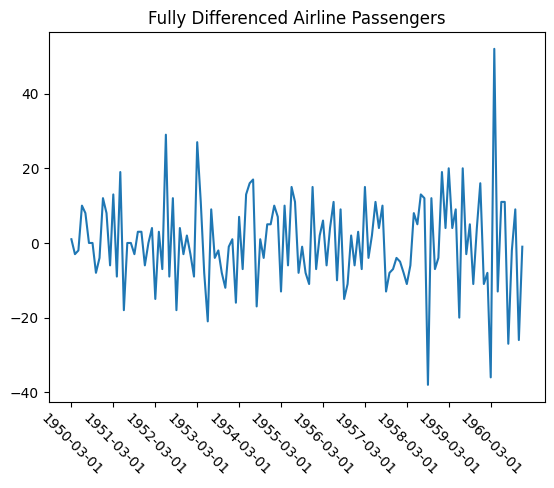

In [21]:
# TODO 13
both_diff = airline['#Passengers'].diff().diff(12).dropna()
#. Your solution here ...

# Plot the fully differenced time series
plt.plot(both_diff)
plt.title('Fully Differenced Airline Passengers')
plt.xticks(both_diff.index[::12], rotation=-45)
plt.show()


#### g) Check if the residual series is stationary

In [22]:
from statsmodels.tsa.stattools import adfuller

# TODO 14: Applying the Augmented Dickey-Fuller test on the first-differenced log-transformed series
# Note: We drop the first NaN value that results from differencing
#. Your solution here ...
adf_output = adfuller(both_diff)

adf_output = pd.Series(adf_result[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_result[4].items():
    adf_output[f'Critical Value ({key})'] = value
    
print(adf_output)

Test Statistic                 -2.71713
p-value                         0.07112
#Lags Used                     14.00000
Number of Observations Used   128.00000
Critical Value (1%)            -3.48250
Critical Value (5%)            -2.88440
Critical Value (10%)           -2.57896
dtype: float64


#### h) Check the ACF and PACF of the residual series -- what model seems to make sense ? 

<Figure size 1200x600 with 0 Axes>

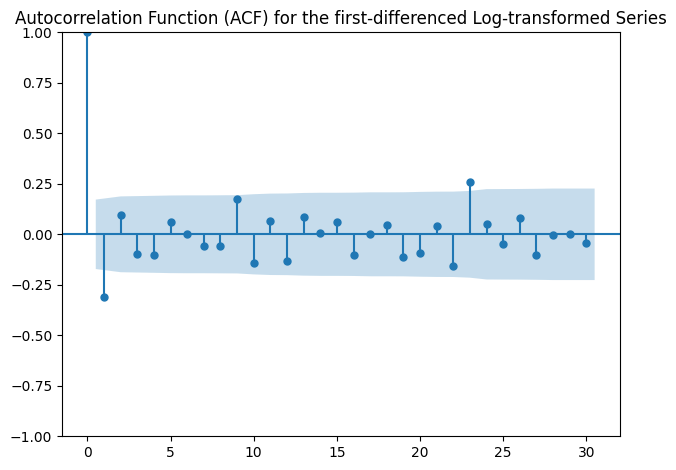

<Figure size 1200x600 with 0 Axes>

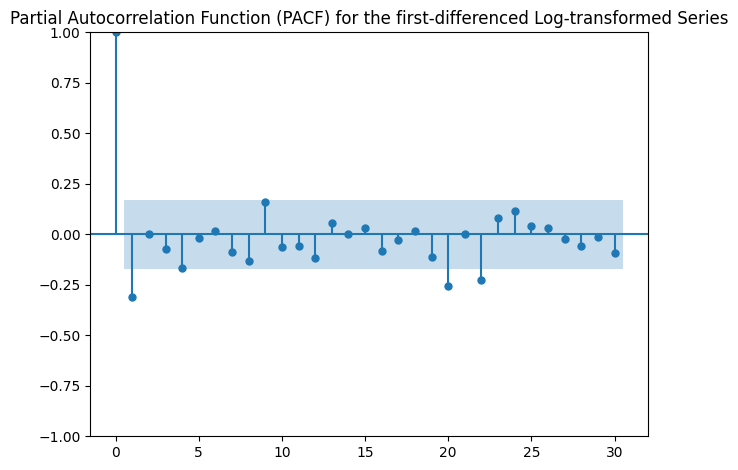

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# TODO 15: Plotting the Autocorrelation Function (ACF)
#. Your solution here ...
plt.figure(figsize=(12, 6))
plot_acf(both_diff, lags=30, alpha=0.05, title='Autocorrelation Function (ACF) for the first-differenced Log-transformed Series')
plt.tight_layout()

# TODO 16: Plotting the Partial Autocorrelation Function (PACF)
#. Your solution here ...
plt.figure(figsize=(12, 6))
plot_pacf(both_diff, lags=30, alpha=0.05, title='Partial Autocorrelation Function (PACF) for the first-differenced Log-transformed Series')
plt.tight_layout()

plt.show()

This is a very difficult model to detect just from the ACF / PACF plots. In principle, we see sharp cutoffs on both the ACF and PACF -- this 

#### i) Use auto_arima to find an optimal seasonal model -- here we should actually see a non-zero seasonal compoinent, make sure you edit your auto_arima function accordingly. 

In [24]:
# Note: We drop the first NaN value that results from differencing
series = airline['#Passengers']

# TODO 17: Use auto_arima to find the optimal SARIMA model
#. Your solution here ...
auto_model = auto_arima(series,
                        start_p=0, start_q=0,
                        max_p=20, max_q=20,  
                        m=12, 
                        start_P=0, start_Q=0, 
                        max_P=20, max_Q=20,
                        seasonal=True,
                        D=1,
                        test='adf',
                        trace=True,
                        error_action='ignore',  
                        suppress_warnings=True, 
                        stepwise=True)

print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1024.482, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1013.464, Time=0.33 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1014.083, Time=0.07 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1013.428, Time=0.01 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1013.976, Time=0.06 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1013.430, Time=0.18 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1015.428, Time=0.06 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1015.428, Time=0.03 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1013.689, Time=0.02 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1010.558, Time=0.13 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1010.702, Time=0.36 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1011.128, Time=0.29 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1010.829, Time=0.85 sec
 ARIMA(3,1,1)(0,1,0)[12]             : AIC=1011.731, Time=0.13 sec
 ARIMA(2,1,2)(0,1,0

#### l) Finally, perform a the Rolling-origin forecast to predict the one-step-ahead generalisation error, under a scenatio in which we receive updates on our data. 

In [25]:
# TODO 18: Extract the order (p, d, q)
# Extract the seasonal order (P, D, Q, m)
#. Your solution here ...
order = auto_model.order  

seasonal_order = auto_model.seasonal_order

print(f"Non-seasonal order: {order}")
print(f"Seasonal order: {seasonal_order}")

Non-seasonal order: (2, 1, 1)
Seasonal order: (0, 1, 0, 12)


In [26]:
# TODO 19: Split the dataset into training and test sets
# Rolling forecast origin
#. Your solution here ...
# Define the split point (e.g., last 12 months for testing)

train_size = int(len(series) * 0.83) # 83% (last 12 months) of the data for training 
series_train, series_test = series[:train_size], series[train_size:]

history = series_train.values.copy()
predictions = []
confidence_intervals = []

# Rolling forecast origin
from tqdm import trange
from statsmodels.tsa.statespace.sarimax import SARIMAX

for t in trange(len(series_test)):
    # Fit the SARIMA model on the history
    model = SARIMAX(history, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)  # Suppress fitting messages
    
    # Forecast the next point and get the 95% confidence interval
    forecast_result = model_fit.get_forecast(steps=1)
    yhat = forecast_result.predicted_mean
    conf_int = forecast_result.conf_int(alpha=0.05)  # 95% confidence interval
    
    predictions.append(yhat[0])  # Access forecast result correctly
    confidence_intervals.append(conf_int[0])  # Store confidence interval for each forecast
    
    # Correctly add the actual observation from series_test to history for the next loop
    actual_obs = series_test.iloc[t]  # Use .iloc[t] to correctly access the observation
    history = np.append(history, actual_obs)


100%|██████████| 25/25 [00:00<00:00, 30.59it/s]


Test RMSE: 17.163317855616558


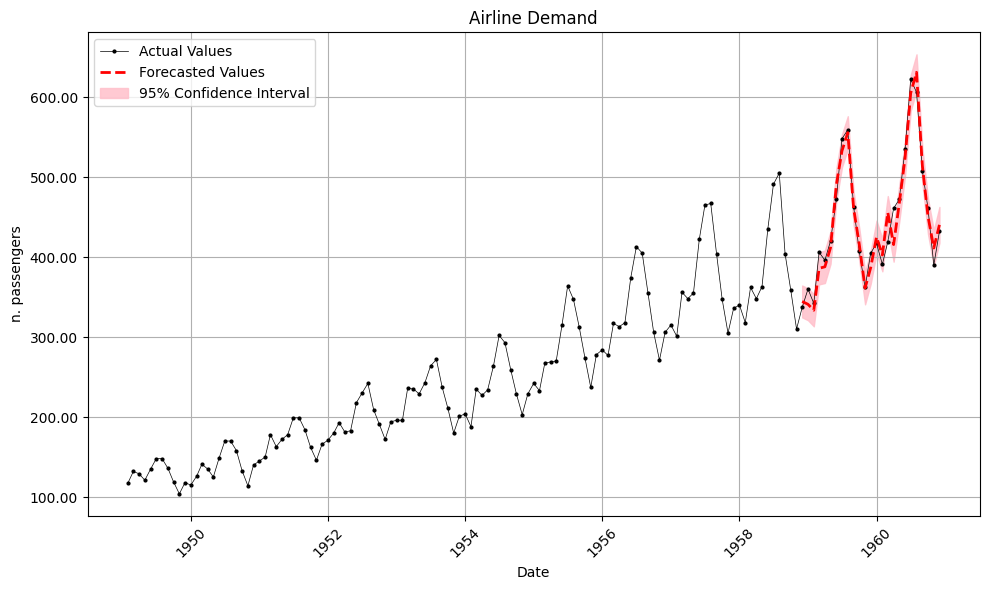

In [27]:
# Calculate RMSE
rmse = np.sqrt(np.mean((predictions - series_test)**2))
print(f'Test RMSE: {rmse}')

# Plotting the forecast along with the actual series and confidence intervals
plt.figure(figsize=(10, 6))
# Plotting the entire original series
plt.plot(series.index, series, marker='o', linestyle='-', color='black', markersize=2, linewidth=0.5, label='Actual Values')

# Plotting the forecasted values on the test set
plt.plot(series_test.index, predictions, label='Forecasted Values', color='red', linestyle='--', linewidth=2)

# Extracting lower and upper confidence bounds
lower_bounds = [ci[0] for ci in confidence_intervals]
upper_bounds = [ci[1] for ci in confidence_intervals]

# Plotting the confidence interval
plt.fill_between(series_test.index, lower_bounds, upper_bounds, color='pink', alpha=0.85, label='95% Confidence Interval')

plt.title('Airline Demand')
plt.xlabel('Date')
plt.ylabel('n. passengers')
plt.grid(True)

# Formatting y-axis labels to avoid scientific notation
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.2f}'.format(x)))

# Ensuring dates are nicely formatted and readable
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()


# SUMMATIVE ASSESSMENT

Now pick a dataset of your choice. Please ensure your dataset is a csv file under 100MB named sem4_portfolio_4_data_custom.csv

Apply timeseries analysis as demonstrated in this notebook and interpret your results exhaustively.

In [28]:
# Do NOT modify the contents of this cell. Start your customization in the next one!
custom_data_path = "sem4_portfolio_3_data_custom.csv"
custom_df = pd.read_csv(custom_data_path)

This dataset contains official price information for major vegetables and fruits in Nepal from 2013 to 2021. The dataset includes daily price data for each vegetable and fruit, as well as the maximum, minimum, and average prices over the period. The prices are based on official figures and provide a valuable resource for anyone interested in analyzing the prices of agricultural commodities in Nepal. We are going to transform the data into monthly by taking the means.

# We are going to predict the price of big tomatoes in Nepal with time series.

#### Part_1: Data Exploration and Data Processing

In [29]:
# Briefly check the Nepal Commodity dataset
display(custom_df.head())

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
0,0,Tomato Big(Nepali),2013-06-16,Kg,35.00000,40.00000,37.50000
1,1,Tomato Small(Local),2013-06-16,Kg,26.00000,32.00000,29.00000
2,2,Potato Red,2013-06-16,Kg,20.00000,21.00000,20.50000
3,3,Potato White,2013-06-16,Kg,15.00000,16.00000,15.50000
4,4,Onion Dry (Indian),2013-06-16,Kg,28.00000,30.00000,29.00000


In [30]:
# Here we only take the price of the commodity "Potato Red" into consideration
custom_df = custom_df[custom_df['Commodity']== 'Potato Red']
custom_df = custom_df[['Average','Date']]

custom_df['Date'] = pd.to_datetime(custom_df['Date'])

custom_df.index = custom_df['Date']
custom_df = custom_df.drop(columns=['Date'])

custom_df = custom_df.resample('M').mean()

display(custom_df.head())

,Average
Date,
2013-06-30,21.77273
2013-07-31,23.48000
2013-08-31,28.14286
2013-09-30,30.36000
2013-10-31,36.77778


#### Part_2: Check the stationary and seasonality of the data

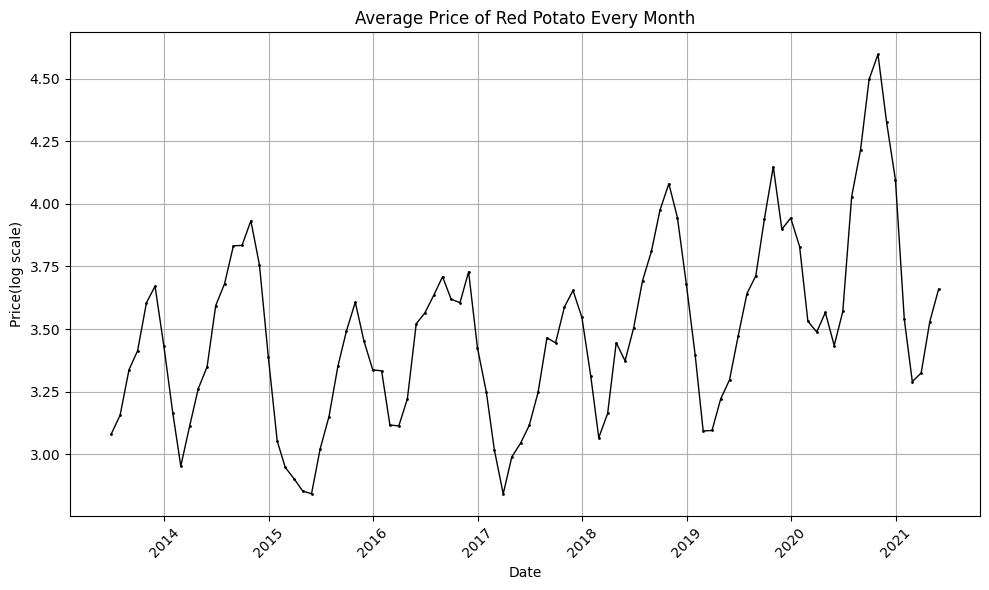

In [31]:
# Plot the time series

# Convert the price column to the log scale
custom_df['log_Average'] = np.log(custom_df['Average'])

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(custom_df.index, custom_df['log_Average'], marker='o', linestyle='-', color='black',markersize = 1,linewidth=1)
plt.title('Average Price of Red Potato Every Month')
plt.xlabel('Date')
plt.ylabel('Price(log scale)')
plt.grid(True)
# Manually format y-axis labels to avoid scientific notation
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.2f}'.format(x)))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Check if it's stationary

In [32]:
from statsmodels.tsa.stattools import adfuller

# Applying the Augmented Dickey-Fuller test on the first-differenced log-transformed series

# Apply log transformation to stabilize variance
custom_df['log_Average'] = np.log(custom_df['Average'])

# First-difference the log-transformed series to remove trend
custom_df['log_Average_diff'] = custom_df['log_Average'].diff()

# Drop the first NaN value that results from differencing
adf_result = adfuller(custom_df['log_Average_diff'].dropna())

# Store ADF test results in a pandas Series
adf_output = pd.Series(adf_result[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_result[4].items():
    adf_output[f'Critical Value ({key})'] = value
    
print(adf_output)

Test Statistic                -3.18235
p-value                        0.02103
#Lags Used                    12.00000
Number of Observations Used   82.00000
Critical Value (1%)           -3.51274
Critical Value (5%)           -2.89749
Critical Value (10%)          -2.58595
dtype: float64


The p value is below 0.05. So there is no one unit root. We can say it's stationary.

By concatenating time series into trend, seasonality, and residual components, we can better understand the underlying structure of the data.

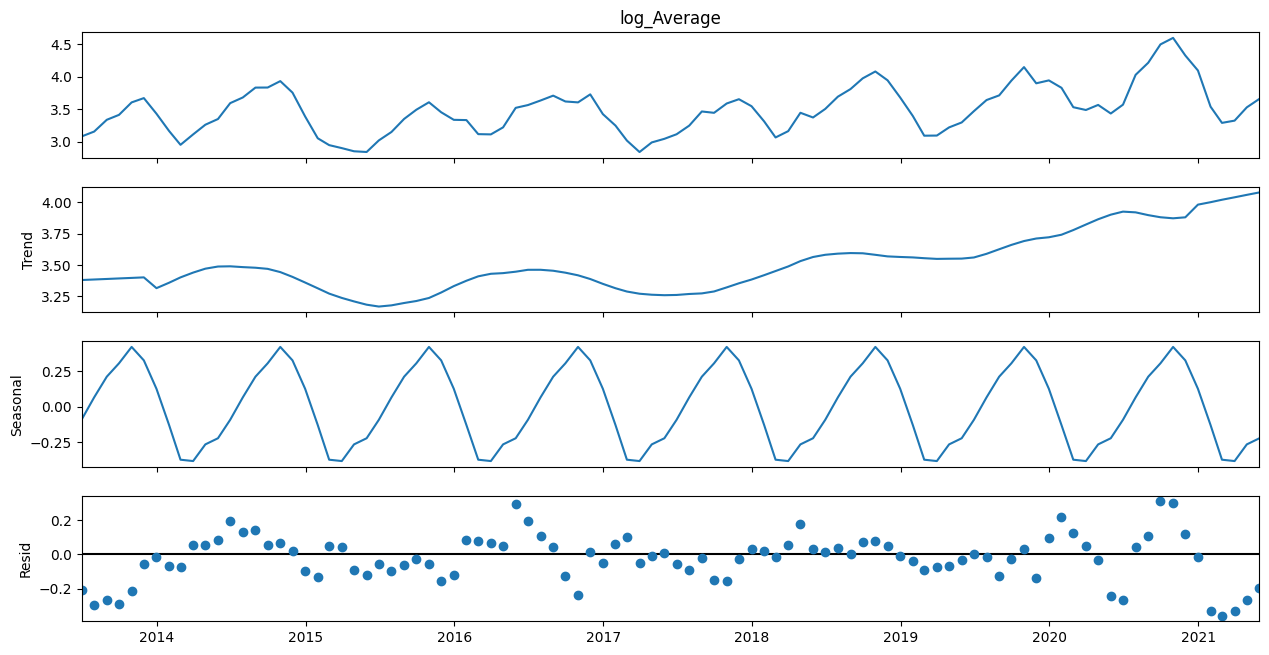

In [33]:
decomposition = sm.tsa.seasonal_decompose(custom_df['log_Average'], model='additive', period=12, extrapolate_trend=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig = decomposition.plot()
fig.set_size_inches(14, 7)
plt.show()

From this graph, we can still find there's a slight trend and seasonality in this data. For better predicting, we are going to do differencing here.

Take a first difference of the series and plot it

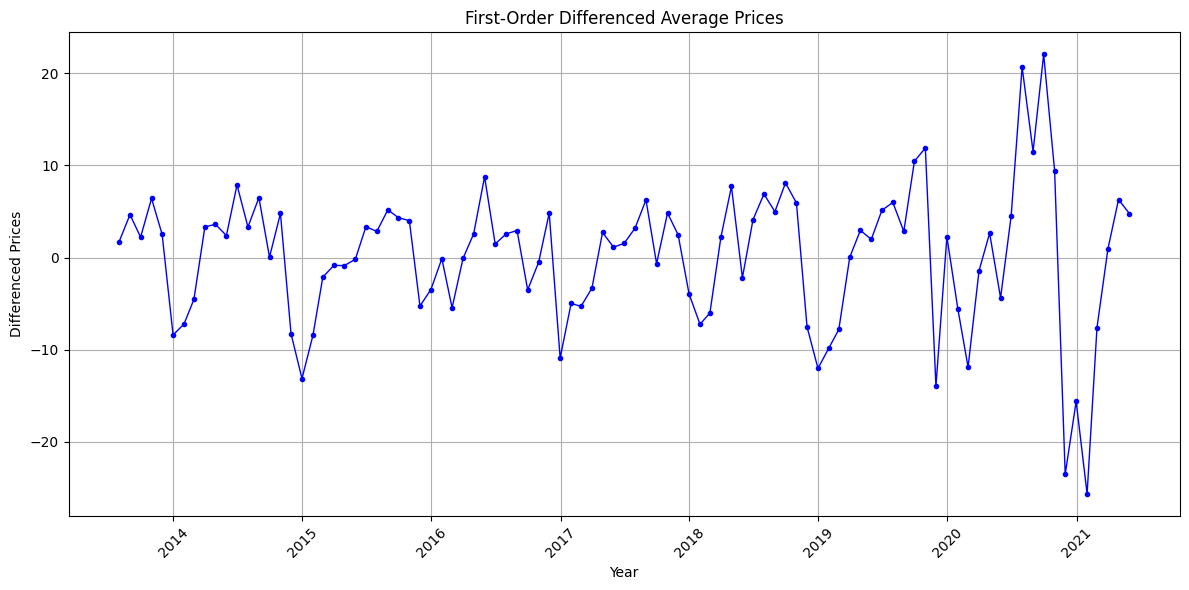

In [34]:
# Differencing

# First-order differencing to remove trend
custom_df['Average_diff'] = custom_df['Average'].diff()

# Drop NaN values from differencing
airline.dropna(inplace=True)

# Plot the differenced series
plt.figure(figsize=(12, 6))
plt.plot(custom_df.index, custom_df['Average_diff'], color='blue', linestyle='-', marker='o', markersize=3, linewidth=1)
plt.title('First-Order Differenced Average Prices')
plt.xlabel('Year')
plt.ylabel('Differenced Prices')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Take the seasonal differencing

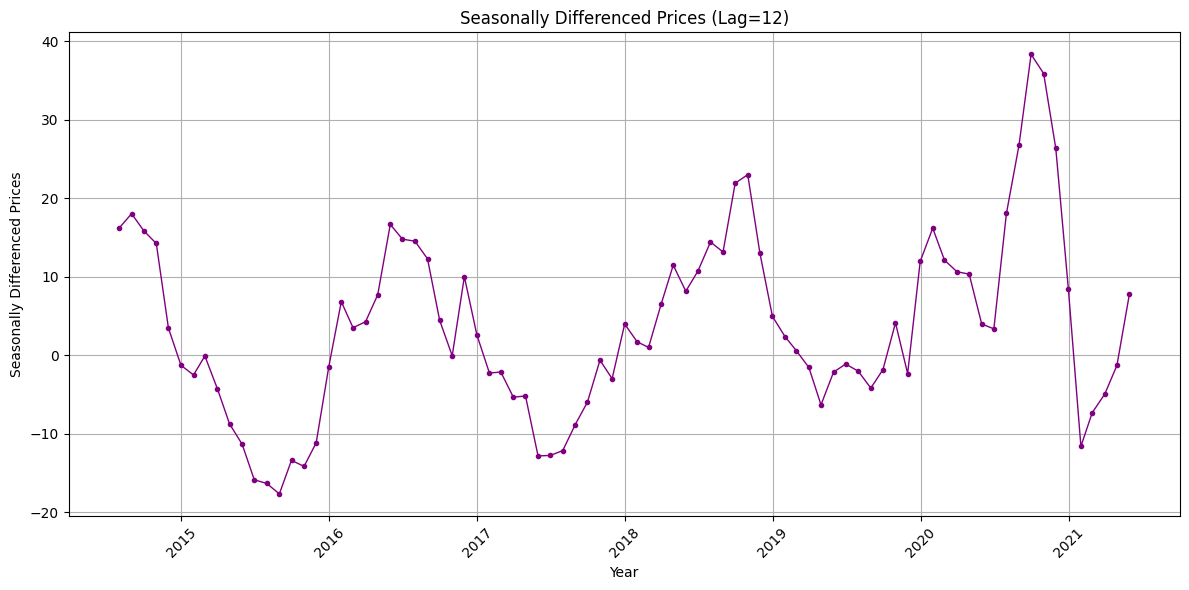

In [35]:
seasonal_diff = custom_df.diff(12).dropna()

# Plot the seasonally differenced time series
plt.figure(figsize=(12, 6))
plt.plot(seasonal_diff.index, seasonal_diff['Average'], color='purple', linestyle='-', marker='o', markersize=3, linewidth=1)

# Title and labels
plt.title('Seasonally Differenced Prices (Lag=12)')
plt.xlabel('Year')
plt.ylabel('Seasonally Differenced Prices')
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

Apply both the differencing and seasonal differencing to the time series

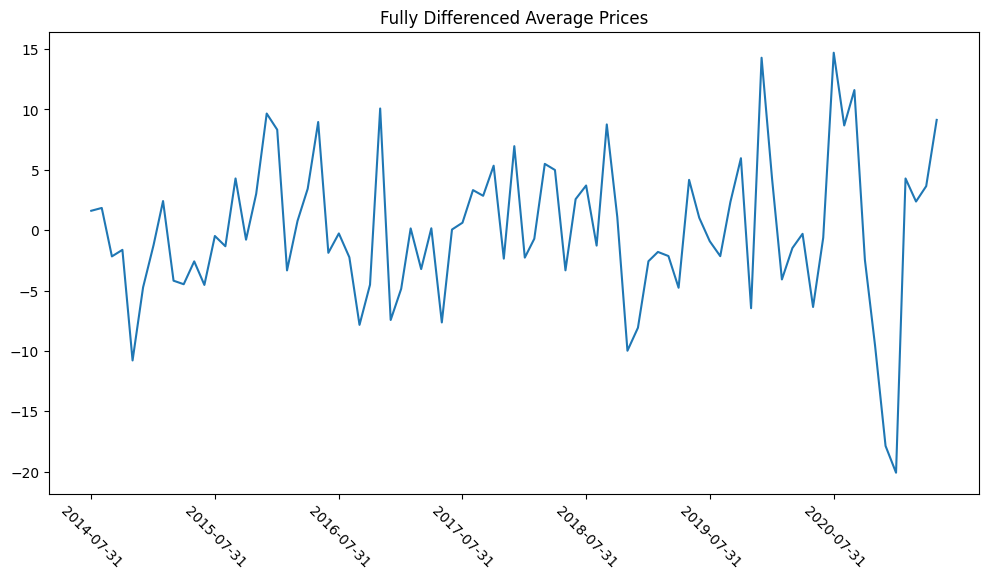

In [36]:
both_diff = custom_df['Average'].diff().diff(12).dropna()

# Plot the fully differenced time series
plt.figure(figsize=(12, 6))
plt.plot(both_diff)
plt.title('Fully Differenced Average Prices')
plt.xticks(both_diff.index[::12], rotation=-45)
plt.show()


Check if its residual is stationary by using ADF test

In [37]:
from statsmodels.tsa.stattools import adfuller

# Applying the Augmented Dickey-Fuller test on the first-differenced log-transformed series
adf_output = adfuller(both_diff)

adf_output = pd.Series(adf_result[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_result[4].items():
    adf_output[f'Critical Value ({key})'] = value
    
print(adf_output)

Test Statistic                -3.18235
p-value                        0.02103
#Lags Used                    12.00000
Number of Observations Used   82.00000
Critical Value (1%)           -3.51274
Critical Value (5%)           -2.89749
Critical Value (10%)          -2.58595
dtype: float64


The p-value below 0.05 here tells us it is stationary. 

Check the ACF and PACF of the residual series

<Figure size 1200x600 with 0 Axes>

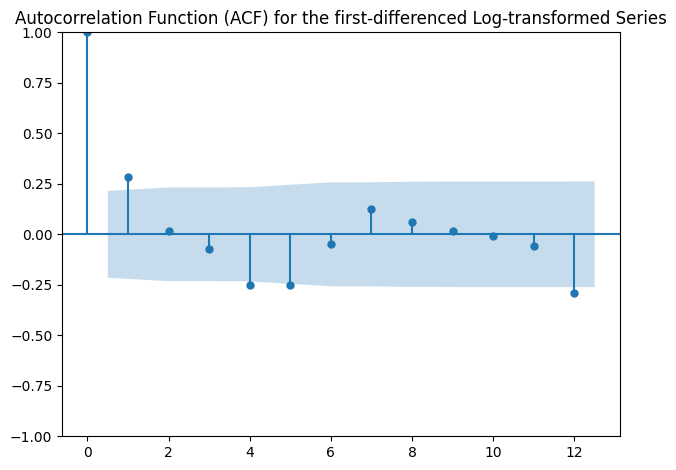

<Figure size 1200x600 with 0 Axes>

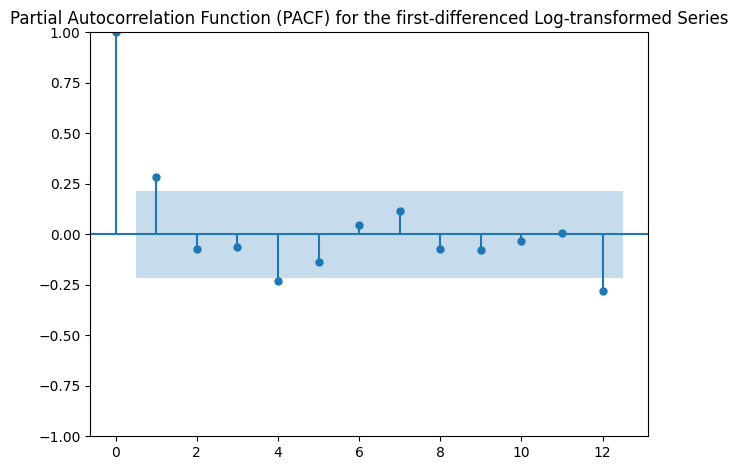

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting the Autocorrelation Function (ACF)
plt.figure(figsize=(12, 6))
plot_acf(both_diff, lags=12, alpha=0.05, title='Autocorrelation Function (ACF) for the first-differenced Log-transformed Series')
plt.tight_layout()

# Plotting the Partial Autocorrelation Function (PACF)
plt.figure(figsize=(12, 6))
plot_pacf(both_diff, lags=12, alpha=0.05, title='Partial Autocorrelation Function (PACF) for the first-differenced Log-transformed Series')
plt.tight_layout()

plt.show()

ACF: The Autocorrelation Function (ACF) plot for the first-differenced log-transformed series shows a strong initial spike at lag 1, followed by values that mostly remain within the confidence bounds. This suggests that the series exhibits short-term dependence, with the first lag having the most significant correlation while subsequent lags do not contribute meaningfully. The rapid decline in autocorrelation after lag 1 indicates that the series is likely stationary and does not exhibit long-term persistence, making it suitable for modeling with a moving average (MA) component of order one, such as an MA(1) process.

PACF: It shows a significant spike at lag 1, indicating that the series follows a strong autoregressive pattern of order one, meaning the most recent past value has a notable influence on the current value. Beyond lag 1, most values fall within the confidence bounds, suggesting that higher-order lags do not contribute substantially to the dependence structure. This pattern supports the idea that an AR(1) model may be appropriate for capturing the time series' dynamics, as additional lags do not show strong significance.

Use auto_arima to find an optimal seasonal model

In [39]:
from pmdarima import auto_arima
import pandas as pd

series = custom_df['Average'].dropna()

series.index = custom_df.index  # Assuming 'series.index' contains date strings

# Use auto_arima to find the optimal SARIMA model
auto_model = auto_arima(series,
                        start_p=0, start_q=0,
                        max_p=20, max_q=20, 
                        m=12,
                        seasonal=True,
                        test='adf',  # Use ADF test to find optimal 'd'
                        trace=True,
                        error_action='ignore',  
                        suppress_warnings=True, 
                        stepwise=True)

print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=753.167, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=791.363, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=624.127, Time=0.08 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=685.703, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=972.900, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=661.421, Time=0.01 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=619.158, Time=0.11 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=645.473, Time=0.06 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=615.786, Time=0.23 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=617.786, Time=0.67 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=619.231, Time=0.63 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=601.289, Time=0.62 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AI

#### Part_3: Time Series Model with Rolling Forecast Origin

In [40]:
# Extract the order
order = auto_model.order

# Extract the seasonal order
seasonal_order = auto_model.seasonal_order

print(f"Non-seasonal order: {order}")
print(f"Seasonal order: {seasonal_order}")

Non-seasonal order: (2, 0, 0)
Seasonal order: (2, 0, 1, 12)


In [41]:
# Split the dataset into training and test sets
train_size = int(len(series) * 0.95)
series_train, series_test = series[:train_size], series[train_size:]

history = series_train.values.copy()
predictions = []
confidence_intervals = []

# Rolling forecast origin
from tqdm import trange
from statsmodels.tsa.statespace.sarimax import SARIMAX

for t in trange(len(series_test)):
    # Fit the SARIMA model on the history
    model = SARIMAX(history, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)  # Suppress fitting messages
    
    # Forecast the next point and get the 95% confidence interval
    forecast_result = model_fit.get_forecast(steps=1)
    yhat = forecast_result.predicted_mean
    conf_int = forecast_result.conf_int(alpha=0.05)  # 95% confidence interval
    
    predictions.append(yhat[0])  # Access forecast result correctly
    confidence_intervals.append(conf_int[0])  # Store confidence interval for each forecast
    
    # Correctly add the actual observation from series_test to history for the next loop
    actual_obs = series_test.iloc[t]  # Use .iloc[t] to correctly access the observation
    history = np.append(history, actual_obs)

100%|██████████| 5/5 [00:01<00:00,  3.19it/s]


Test RMSE: 8.455692421088278


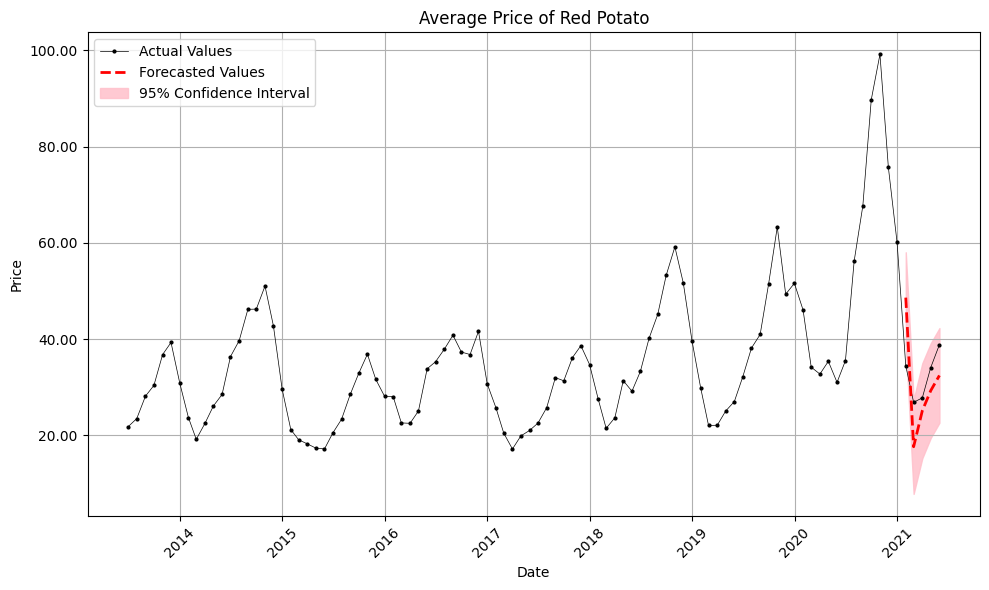

In [42]:
# Calculate RMSE
rmse = np.sqrt(np.mean((predictions - series_test)**2))
print(f'Test RMSE: {rmse}')

# Plotting the forecast along with the actual series and confidence intervals
plt.figure(figsize=(10, 6))
# Plotting the entire original series
plt.plot(series.index, series, marker='o', linestyle='-', color='black', markersize=2, linewidth=0.5, label='Actual Values')

# Plotting the forecasted values on the test set
plt.plot(series_test.index, predictions, label='Forecasted Values', color='red', linestyle='--', linewidth=2)

# Extracting lower and upper confidence bounds
lower_bounds = [ci[0] for ci in confidence_intervals]
upper_bounds = [ci[1] for ci in confidence_intervals]

# Plotting the confidence interval
plt.fill_between(series_test.index, lower_bounds, upper_bounds, color='pink', alpha=0.85, label='95% Confidence Interval')

plt.title('Average Price of Red Potato')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
# Manually format y-axis labels to avoid scientific notation
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.2f}'.format(x)))
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()